In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('combined_data_with_extra_data2.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,Run ID,Sex,Age,Country,BMI,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,ERR1075960,Male,0.0,United States of America,21.22,Health,0.034320,0.320964,0.005633,0.013763,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ERR1854747,Male,62.0,United Kingdom,28.70,Health,0.038577,0.204173,0.014874,0.008240,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ERR688529,Male,63.0,Austria,30.90,Health,0.086423,0.066411,0.026879,0.069596,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ERR1316059,Male,67.0,United States of America,22.15,Health,0.096800,0.233068,0.009989,0.015105,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SRR5649200,Male,27.0,United States of America,20.80,Health,0.083754,0.196804,0.058733,0.039295,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640,SRR7690181,male,68.0,USA,28.75,Health,0.000000,0.021739,0.000000,0.000000,...,0.0,0.217391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1641,SRR7690182,female,69.0,USA,29.05,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1642,SRR7690183,female,59.0,USA,23.66,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1643,SRR7690184,female,56.0,USA,43.85,Bipolar Disorder,0.000000,0.020000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.columns

Index(['Run ID', 'Sex', 'Age', 'Country', 'BMI', 'Condition', 'Alistipes',
       'Bacteroides', 'Bifidobacterium', 'Blautia', 'Clostridium', 'Dorea',
       'Eubacterium', 'Faecalibacterium', 'Oscillibacter', 'Parabacteroides',
       'Roseburia', 'Ruminococcus', 'Unknown', 'Coprococcus', 'Lachnospira',
       'Oscillospira', 'Subdoligranulum', 'Sutterella', 'Anaerostipes',
       'Streptococcus', 'Akkermansia', 'Anaerofilum', 'Anaerotruncus',
       'Bacillus', 'Barnesiella', 'Desulfovibrio', 'Dialister',
       'Erysipelatoclostridium', 'Holdemania', 'Intestinibacter',
       'Lachnoclostridium', 'Lactobacillus', 'Odoribacter', 'Prevotella',
       'Pseudomonas', 'Sporobacter', 'Ruminiclostridium', 'Corynebacterium',
       'Eggerthella', 'Acinetobacter', 'Parasutterella', 'Veillonella',
       'Uncultured Organism', 'Ruminococcaceae', 'Phocaeicola',
       'Paraprevotella', 'Tidjanibacter', 'Flavonifractor',
       'Mediterraneibacter', 'Agathobacter', 'Ligilactobacillus',
       '

In [4]:
df['Ruminococcus'] += df[['Ruminococcaceae']].sum(axis=1)

In [5]:
df = df.drop(['Ruminococcaceae', 'Unknown', 'Uncultured Organism', 'Run ID'], axis=1)

In [6]:
df

,Sex,Age,Country,BMI,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,Male,0.0,United States of America,21.22,Health,0.034320,0.320964,0.005633,0.013763,0.003310,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Male,62.0,United Kingdom,28.70,Health,0.038577,0.204173,0.014874,0.008240,0.001926,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Male,63.0,Austria,30.90,Health,0.086423,0.066411,0.026879,0.069596,0.082330,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Male,67.0,United States of America,22.15,Health,0.096800,0.233068,0.009989,0.015105,0.003086,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Male,27.0,United States of America,20.80,Health,0.083754,0.196804,0.058733,0.039295,0.001121,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640,male,68.0,USA,28.75,Health,0.000000,0.021739,0.000000,0.000000,0.000000,...,0.0,0.217391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1641,female,69.0,USA,29.05,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1642,female,59.0,USA,23.66,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1643,female,56.0,USA,43.85,Bipolar Disorder,0.000000,0.020000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
numeric_cols = df.select_dtypes(include=['number']).drop(columns=['Age', 'BMI'])
# df[df.sum(axis=1) == 0]
zero_rows = numeric_cols.sum(axis=1) == 0
#df = df.drop(zero_rows, axis=0)
df = df[~zero_rows]

In [8]:
df[numeric_cols.columns] = numeric_cols.div(numeric_cols.sum(axis=1), axis=0)

/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_35722/597223563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols.columns] = numeric_cols.div(numeric_cols.sum(axis=1), axis=0)


In [9]:
df.reset_index(drop=True)

,Sex,Age,Country,BMI,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,Male,0.0,United States of America,21.22,Health,0.062933,0.588542,0.010329,0.025237,0.006070,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Male,62.0,United Kingdom,28.70,Health,0.086461,0.457608,0.033337,0.018467,0.004317,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Male,63.0,Austria,30.90,Health,0.086534,0.066497,0.026914,0.069686,0.082436,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Male,67.0,United States of America,22.15,Health,0.138701,0.333954,0.014312,0.021643,0.004422,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Male,27.0,United States of America,20.80,Health,0.161436,0.379339,0.113208,0.075742,0.002161,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,male,58.0,USA,25.80,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604,male,68.0,USA,28.75,Health,0.000000,0.090909,0.000000,0.000000,0.000000,...,0.0,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1605,female,59.0,USA,23.66,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1606,female,56.0,USA,43.85,Bipolar Disorder,0.000000,0.125000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df['Sex'] = df['Sex'].str.lower()
df['Sex'].unique()

/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_35722/3465031610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].str.lower()


array(['male', 'female', '0'], dtype=object)

In [11]:
df

,Sex,Age,Country,BMI,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,male,0.0,United States of America,21.22,Health,0.062933,0.588542,0.010329,0.025237,0.006070,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,male,62.0,United Kingdom,28.70,Health,0.086461,0.457608,0.033337,0.018467,0.004317,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,male,63.0,Austria,30.90,Health,0.086534,0.066497,0.026914,0.069686,0.082436,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,male,67.0,United States of America,22.15,Health,0.138701,0.333954,0.014312,0.021643,0.004422,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,male,27.0,United States of America,20.80,Health,0.161436,0.379339,0.113208,0.075742,0.002161,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,male,58.0,USA,25.80,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1640,male,68.0,USA,28.75,Health,0.000000,0.090909,0.000000,0.000000,0.000000,...,0.0,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1642,female,59.0,USA,23.66,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1643,female,56.0,USA,43.85,Bipolar Disorder,0.000000,0.125000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df['Condition'].unique()

array(['Health', 'Parkinsons', 'Alzheimers',
       'Bipolar Disorder, Depression, Schizophrenia',
       'Bipolar Disorder, Depression, Epilepsy, Schizophrenia',
       'Bipolar Disorder', 'Epilepsy', 'Depression', 'Schizophrenia'],
      dtype=object)

In [13]:
df_label = df['Condition']
df_label

0                 Health
1                 Health
2                 Health
3                 Health
4                 Health
              ...       
1639    Bipolar Disorder
1640              Health
1642    Bipolar Disorder
1643    Bipolar Disorder
1644    Bipolar Disorder
Name: Condition, Length: 1608, dtype: object

In [14]:
df = df.drop(['Condition'], axis=1)

In [15]:
dictionary = {'Health': 0,
              'Parkinsons': 1,
              'Alzheimers': 2,
              'Bipolar Disorder, Depression, Schizophrenia': 3,
              'Bipolar Disorder, Depression, Epilepsy, Schizophrenia': 4,
              'Bipolar Disorder': 5,
              'Epilepsy': 6,
              'Depression': 7,
              'Schizophrenia': 8
}

In [16]:
df_label = df_label.map(dictionary)
df_label

0       0
1       0
2       0
3       0
4       0
       ..
1639    5
1640    0
1642    5
1643    5
1644    5
Name: Condition, Length: 1608, dtype: int64

In [17]:
df['Condition'] = df_label 
df = df[['Condition'] + [col for col in df.columns if col != 'Condition']]

In [18]:
df

,Condition,Sex,Age,Country,BMI,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,0,male,0.0,United States of America,21.22,0.062933,0.588542,0.010329,0.025237,0.006070,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,male,62.0,United Kingdom,28.70,0.086461,0.457608,0.033337,0.018467,0.004317,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,male,63.0,Austria,30.90,0.086534,0.066497,0.026914,0.069686,0.082436,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,male,67.0,United States of America,22.15,0.138701,0.333954,0.014312,0.021643,0.004422,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,male,27.0,United States of America,20.80,0.161436,0.379339,0.113208,0.075742,0.002161,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,5,male,58.0,USA,25.80,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1640,0,male,68.0,USA,28.75,0.000000,0.090909,0.000000,0.000000,0.000000,...,0.0,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1642,5,female,59.0,USA,23.66,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1643,5,female,56.0,USA,43.85,0.000000,0.125000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#df.to_csv('final_df.csv', index=False)

In [20]:
df = df[(df['Condition'] != 2) & (df['Condition'] != 3) & (df['Condition'] != 4) & (df['Condition'] != 5) & 
        (df['Condition'] != 6) & (df['Condition'] != 7) & (df['Condition'] != 8)]

In [21]:
df['Condition'].unique()

array([0, 1])

In [22]:
df

,Condition,Sex,Age,Country,BMI,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,0,male,0.0,United States of America,21.22,0.062933,0.588542,0.010329,0.025237,0.006070,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,male,62.0,United Kingdom,28.70,0.086461,0.457608,0.033337,0.018467,0.004317,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,male,63.0,Austria,30.90,0.086534,0.066497,0.026914,0.069686,0.082436,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,male,67.0,United States of America,22.15,0.138701,0.333954,0.014312,0.021643,0.004422,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,male,27.0,United States of America,20.80,0.161436,0.379339,0.113208,0.075742,0.002161,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,0,male,32.0,USA,23.71,0.000000,0.000000,0.000000,0.500000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1623,0,male,69.0,USA,25.11,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1625,0,male,73.0,USA,24.13,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1632,0,female,32.0,USA,29.05,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df = df.loc[:, (df != 0).any(axis=0)]

In [24]:
df

,Condition,Sex,Age,Country,BMI,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,...,Lachnospira,Oscillospira,Subdoligranulum,Sutterella,Anaerostipes,Prevotella,Ruminiclostridium,Phocaeicola,Paraprevotella,Tidjanibacter
0,0,male,0.0,United States of America,21.22,0.062933,0.588542,0.010329,0.025237,0.006070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0,male,62.0,United Kingdom,28.70,0.086461,0.457608,0.033337,0.018467,0.004317,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0,male,63.0,Austria,30.90,0.086534,0.066497,0.026914,0.069686,0.082436,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0,male,67.0,United States of America,22.15,0.138701,0.333954,0.014312,0.021643,0.004422,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0,male,27.0,United States of America,20.80,0.161436,0.379339,0.113208,0.075742,0.002161,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,0,male,32.0,USA,23.71,0.000000,0.000000,0.000000,0.500000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1623,0,male,69.0,USA,25.11,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1625,0,male,73.0,USA,24.13,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1632,0,female,32.0,USA,29.05,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [25]:
df['Age'].unique()

array([ 0.     , 62.     , 63.     , 67.     , 27.     , 34.     ,
       52.     , 20.     , 26.     , 22.     , 31.     , 19.     ,
       10.     , 29.     , 61.     , 39.     ,  0.49589, 30.     ,
       57.     , 65.     , 47.     , 23.     , 49.     , 46.     ,
       64.     ,  4.     , 32.     , 42.     , 28.     , 38.     ,
       59.     , 50.     , 37.     , 54.     , 25.     ,  9.     ,
       66.     , 58.     , 35.     , 72.     ,  2.     , 55.     ,
       21.     , 24.     ,  2.01644, 18.     , 53.     , 56.     ,
       33.     , 75.     , 80.     , 69.     , 45.     , 43.     ,
       36.     , 60.     , 73.     , 71.     , 70.     , 74.     ,
       68.     , 78.     , 44.     ])

In [26]:
df = df[df['Age'] >= 1]

In [27]:
df

,Condition,Sex,Age,Country,BMI,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,...,Lachnospira,Oscillospira,Subdoligranulum,Sutterella,Anaerostipes,Prevotella,Ruminiclostridium,Phocaeicola,Paraprevotella,Tidjanibacter
1,0,male,62.0,United Kingdom,28.70,0.086461,0.457608,0.033337,0.018467,0.004317,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0,male,63.0,Austria,30.90,0.086534,0.066497,0.026914,0.069686,0.082436,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0,male,67.0,United States of America,22.15,0.138701,0.333954,0.014312,0.021643,0.004422,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0,male,27.0,United States of America,20.80,0.161436,0.379339,0.113208,0.075742,0.002161,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5,0,male,34.0,New Zealand,27.30,0.051193,0.300099,0.118299,0.034665,0.005867,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,0,male,32.0,USA,23.71,0.000000,0.000000,0.000000,0.500000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1623,0,male,69.0,USA,25.11,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1625,0,male,73.0,USA,24.13,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1632,0,female,32.0,USA,29.05,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [28]:
df['Country'].unique()

array(['United Kingdom', 'Austria', 'United States of America',
       'New Zealand', 'Canada', 'China', 'Germany', 'Denmark', 'India',
       'Japan', 'Italy', 'Brazil', 'Finland', 'USA'], dtype=object)

In [29]:
df = df.drop(['Country'], axis=1)

In [30]:
df['BMI'].unique()

array([28.7   , 30.9   , 22.15  , 20.8   , 27.3   , 25.8   , 24.93  ,
       22.5   , 20.3601, 28.8288, 22.04  , 24.4898, 17.52  , 22.1607,
       27.    , 18.41  , 29.0367, 23.46  , 24.7183, 25.37  , 19.38  ,
       31.3   , 23.67  , 31.5   , 18.02  , 19.49  , 22.24  , 33.7   ,
       26.22  , 24.6   , 22.4914, 25.71  , 19.0311, 22.9224, 33.3   ,
       23.02  , 23.63  , 20.36  , 24.2989, 30.02  , 26.91  , 28.8   ,
       31.8   , 23.92  , 28.2   , 27.55  , 15.5   , 27.76  , 25.54  ,
       28.    , 25.75  , 24.3911, 25.38  , 35.5   , 21.03  , 20.    ,
       24.13  , 24.63  , 22.3   , 23.996 , 14.9367, 20.01  , 24.3504,
       23.7388, 21.46  , 25.74  , 26.4264, 24.4646, 25.6   , 21.3   ,
       22.4059, 20.72  , 20.47  , 21.31  , 21.7   , 22.6667, 22.03  ,
       20.05  , 32.    , 23.5   , 23.6   , 21.95  , 21.79  , 20.98  ,
       20.51  , 33.5   , 28.3   , 19.8   , 21.1   , 21.29  , 22.7   ,
       22.2   , 30.77  , 22.1   , 24.974 , 23.1473, 27.46  , 28.9   ,
       40.2   , 25.3

In [31]:
len(df[df['BMI'] == 0])

74

In [32]:
df[df['Condition'] == 1]

,Condition,Sex,Age,BMI,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,...,Lachnospira,Oscillospira,Subdoligranulum,Sutterella,Anaerostipes,Prevotella,Ruminiclostridium,Phocaeicola,Paraprevotella,Tidjanibacter
164,1,male,61.0,0.0,0.012297,0.227848,0.0,0.012658,0.033273,0.011573,...,0.041230,0.133454,0.175045,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
165,1,male,53.0,0.0,0.012663,0.293938,0.0,0.000000,0.051803,0.016500,...,0.090560,0.101688,0.112433,0.021489,0.000000,0.0,0.0,0.0,0.0,0.0
166,1,male,66.0,0.0,0.018452,0.420100,0.0,0.033321,0.013257,0.028484,...,0.023110,0.076138,0.144393,0.030992,0.000000,0.0,0.0,0.0,0.0,0.0
167,1,male,63.0,0.0,0.004679,0.334154,0.0,0.009850,0.041862,0.008126,...,0.150209,0.074120,0.102684,0.060822,0.000000,0.0,0.0,0.0,0.0,0.0
168,1,male,72.0,0.0,0.011071,0.676675,0.0,0.001877,0.067180,0.003941,...,0.011071,0.027210,0.025145,0.025521,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,1,female,54.0,0.0,0.006816,0.145962,0.0,0.010545,0.007459,0.020448,...,0.011060,0.104552,0.270447,0.008102,0.000000,0.0,0.0,0.0,0.0,0.0
234,1,female,64.0,0.0,0.005592,0.200097,0.0,0.019207,0.008753,0.012886,...,0.027231,0.081692,0.342573,0.019451,0.001459,0.0,0.0,0.0,0.0,0.0
235,1,female,54.0,0.0,0.009119,0.228930,0.0,0.040066,0.052777,0.024592,...,0.034540,0.040895,0.131528,0.026250,0.004421,0.0,0.0,0.0,0.0,0.0
236,1,female,62.0,0.0,0.017355,0.436792,0.0,0.030508,0.046767,0.021922,...,0.107965,0.067592,0.084034,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [33]:
df = df.drop(['BMI'], axis=1)

In [34]:
df

,Condition,Sex,Age,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,...,Lachnospira,Oscillospira,Subdoligranulum,Sutterella,Anaerostipes,Prevotella,Ruminiclostridium,Phocaeicola,Paraprevotella,Tidjanibacter
1,0,male,62.0,0.086461,0.457608,0.033337,0.018467,0.004317,0.001799,0.041012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0,male,63.0,0.086534,0.066497,0.026914,0.069686,0.082436,0.043823,0.257714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0,male,67.0,0.138701,0.333954,0.014312,0.021643,0.004422,0.000233,0.005934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0,male,27.0,0.161436,0.379339,0.113208,0.075742,0.002161,0.004188,0.030981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5,0,male,34.0,0.051193,0.300099,0.118299,0.034665,0.005867,0.016604,0.026881,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,0,male,32.0,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1623,0,male,69.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1625,0,male,73.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1632,0,female,32.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [35]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

In [36]:
df

,Condition,Sex,Age,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,...,Lachnospira,Oscillospira,Subdoligranulum,Sutterella,Anaerostipes,Prevotella,Ruminiclostridium,Phocaeicola,Paraprevotella,Tidjanibacter
1,0,1,62.0,0.086461,0.457608,0.033337,0.018467,0.004317,0.001799,0.041012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0,1,63.0,0.086534,0.066497,0.026914,0.069686,0.082436,0.043823,0.257714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0,1,67.0,0.138701,0.333954,0.014312,0.021643,0.004422,0.000233,0.005934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0,1,27.0,0.161436,0.379339,0.113208,0.075742,0.002161,0.004188,0.030981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5,0,1,34.0,0.051193,0.300099,0.118299,0.034665,0.005867,0.016604,0.026881,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,0,1,32.0,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1623,0,1,69.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1625,0,1,73.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1632,0,0,32.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [37]:
df.dtypes

Condition              int64
Sex                    int64
Age                  float64
Alistipes            float64
Bacteroides          float64
Bifidobacterium      float64
Blautia              float64
Clostridium          float64
Dorea                float64
Eubacterium          float64
Faecalibacterium     float64
Oscillibacter        float64
Parabacteroides      float64
Roseburia            float64
Ruminococcus         float64
Coprococcus          float64
Lachnospira          float64
Oscillospira         float64
Subdoligranulum      float64
Sutterella           float64
Anaerostipes         float64
Prevotella           float64
Ruminiclostridium    float64
Phocaeicola          float64
Paraprevotella       float64
Tidjanibacter        float64
dtype: object

In [38]:
df

,Condition,Sex,Age,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,...,Lachnospira,Oscillospira,Subdoligranulum,Sutterella,Anaerostipes,Prevotella,Ruminiclostridium,Phocaeicola,Paraprevotella,Tidjanibacter
1,0,1,62.0,0.086461,0.457608,0.033337,0.018467,0.004317,0.001799,0.041012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0,1,63.0,0.086534,0.066497,0.026914,0.069686,0.082436,0.043823,0.257714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0,1,67.0,0.138701,0.333954,0.014312,0.021643,0.004422,0.000233,0.005934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0,1,27.0,0.161436,0.379339,0.113208,0.075742,0.002161,0.004188,0.030981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5,0,1,34.0,0.051193,0.300099,0.118299,0.034665,0.005867,0.016604,0.026881,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,0,1,32.0,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1623,0,1,69.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1625,0,1,73.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1632,0,0,32.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [39]:
y = df['Condition']
X = df.drop(['Condition'], axis=1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [41]:
# rus = RandomUnderSampler(random_state=42)
# X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

In [42]:
print('length of class 0:', len(y_train[y_train == 0]))
print('length of class 1:', len(y_train[y_train == 1]))

length of class 0: 157
length of class 1: 55


In [43]:
# print('length of class 0:', len(y_train_under[y_train_under == 0]))
# print('length of class 1:', len(y_train_under[y_train_under == 1]))

In [44]:
# same accuracy as without under sampling 
# confusion matrix is better - less false negatives 
# auc roc is slightly lower ~ 0.02 ish 
# precision recall curve is also lower ~ 0.12 

In [45]:
smote = SMOTE(random_state=25)
X_train_over_smote, y_train_over_smote = smote.fit_resample(X_train, y_train)

In [46]:
print('length of class 0:', len(y_train_over_smote[y_train_over_smote == 0]))
print('length of class 1:', len(y_train_over_smote[y_train_over_smote == 1]))

length of class 0: 157
length of class 1: 157


In [47]:
# increased accuracy by ~ 0.02
# cm looks better - less false negatives 
# auc roc score the same as without over/under sampling 
# precision recall curve is better and higher than regular model by ~ 0.01 

In [48]:
lr = LogisticRegression(max_iter = 1000, random_state=23)
lr.fit(X_train_over_smote, y_train_over_smote)
y_pred = lr.predict(X_test)

In [49]:
accuracy = accuracy_score(y_test, y_pred)
np.round(accuracy, decimals=4)

0.8704

In [50]:
y_prob = lr.predict_proba(X_test)
# rows are samples and the columns are the probabilities of that sample belonging to the corresponding class 
y_prob[1]

array([0.20328962, 0.79671038])

In [51]:
y_test_array = np.array(y_test)
y_test_array

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0])

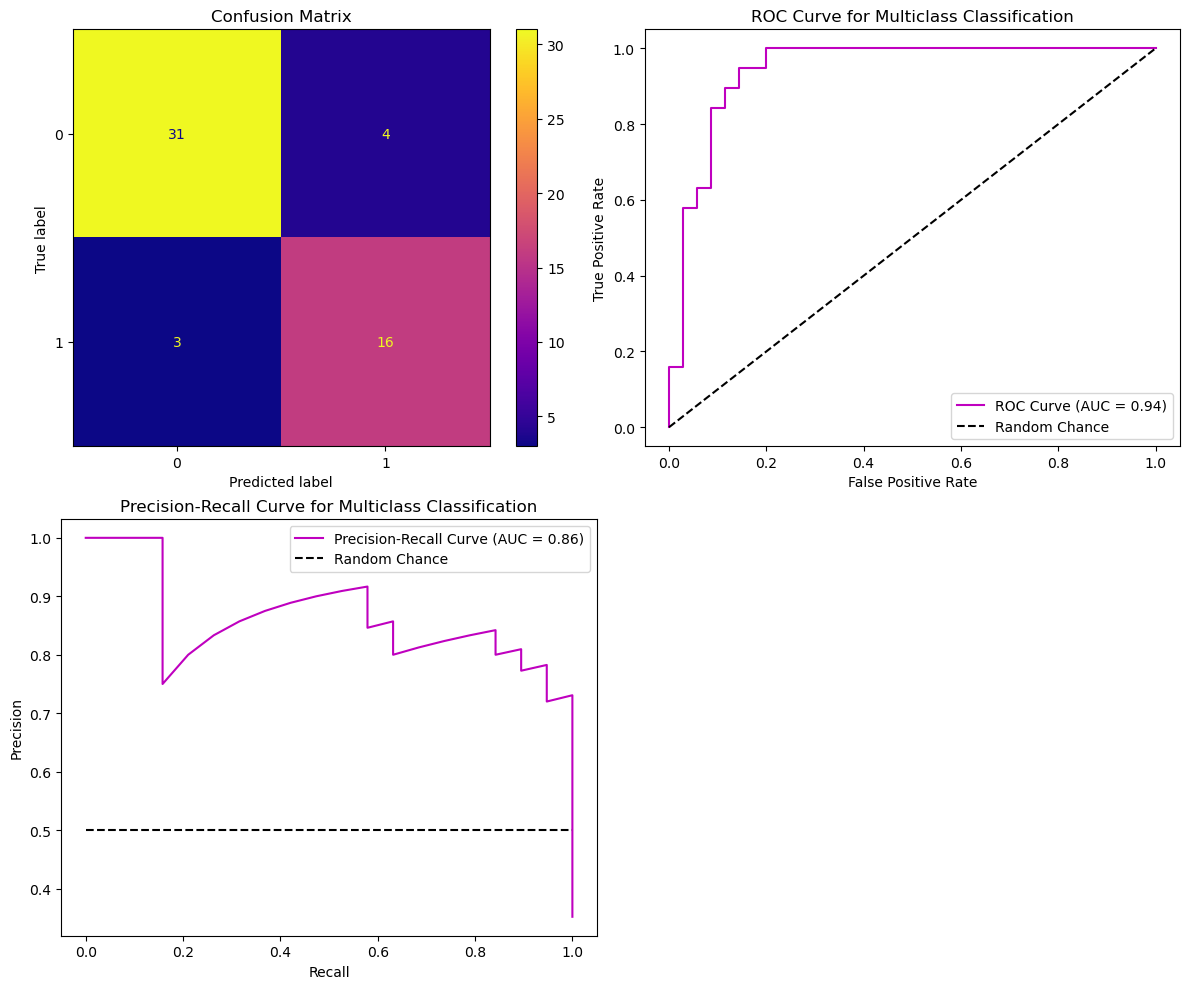

In [52]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='plasma', ax=axs[0, 0])  # Top-left subplot
axs[0, 0].set_title('Confusion Matrix')

# roc curve
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
axs[0, 1].plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', c='m')
axs[0, 1].plot([0, 1], [0, 1], 'k--', label='Random Chance')
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('ROC Curve for Multiclass Classification')
axs[0, 1].legend()

# precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob[:, 1])
pr_auc = auc(recall, precision)
axs[1, 0].plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})', c='m')

axs[1, 0].plot([0, 1], [0.5, 0.5], 'k--', label='Random Chance')
axs[1, 0].set_xlabel('Recall')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].set_title('Precision-Recall Curve for Multiclass Classification')
axs[1, 0].legend()

axs[1, 1].axis('off')

plt.tight_layout()
#plt.savefig('log_reg_health_park.jpg')
plt.show()
